In [1]:
#import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import requests library.
import requests

# Import the APIkey.
from config import weather_api_key

# import datetime
import time 
from datetime import datetime

In [2]:
# previous placement of large code

In [3]:
 # Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

42.63894523677038 54.327529005816956
-44.690858196950515 -110.62724946298735
6.2232059798430015 -95.00377198506688
70.4759653381696 -19.853279062607072
-36.930411186988024 45.3015932197047
35.26684317069636 -69.81034586009048
-84.0418491740822 173.84125948827875
69.6391004059619 46.44858934773558
-78.73422839131884 2.74822267887356
37.53192125909588 126.93079335224485
-35.12593395598508 23.192914516843842
62.74521143301487 17.52481518324325
-38.62344133881398 -49.95401387359101
-64.12736766060465 60.92352432979783
-31.13220809882047 -150.43843590135762
60.94619593166195 -96.11440143924413
-62.39784636553248 -84.05892531216782
-58.1810684676409 18.984201087116674
46.21598368002395 -108.81809258684397
54.33030213676196 -110.52134357327282
38.226566583984436 124.8592057084586
-42.61834034792245 110.791850307441
61.23075638386484 64.63315009842717
-56.888877303847835 78.93156516817766
-44.537745899898354 -68.94814506023867
-50.275164752516396 9.558715577430775
-4.567390917677088 53.0171935

27.33072357767618 -65.21605588183162
51.905146305378736 -100.31492996160735
-72.4839864785131 -120.09495287144266
59.27340281640153 160.77849318077585
-2.0939013409197287 -151.69136764036995
35.057688689308875 -173.94478197441236
79.99462399996978 179.21860805234843
58.337445063437315 90.61530661497574
82.1089571882674 -137.95017615921088
25.309279716687712 62.35391799889507
-2.1773260033266126 -53.09777568788326
-42.285423441462555 46.360699037659
-8.809735720737493 14.85280336927741
-36.771869927583374 -15.626590540248827
23.20568992766823 -70.21492059707137
7.552332769041698 -148.97722928679306
-32.9839385863174 -53.60119635576392
73.47934184967264 -48.97464392894966
59.4781407612646 80.48527260198478
37.53860568639486 -41.52961168903718
-40.73591176581409 -161.51007889438884
80.16359383816803 55.92767652635882
-3.0559960027783433 -111.00855352832636
-41.92239934615495 90.33853969166779
0.4951149852574588 148.75488222842768
-30.549354059576693 -56.01923610325467
37.267600033171945 -

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique then we will add it to the list of cities.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficent count. 
len(cities)

628

In [8]:
# Starting URL for weather map api call.
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"




In [9]:
# create an empty list to hold the weather data
city_data = []
#print the beginning of logging .
print("Beginning of weather retrieval     ")
print("-----------------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=  " + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city,
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city informations into the city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experianced, skip the city.
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete.     ")
print("-----------------------------")
    


Beginning of weather retrieval     
-----------------------------------
Processing Record 1 of Set 1 | zhanaozen
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | mezen
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | seoul
Processing Record 11 of Set 1 | plettenberg bay
Processing Record 12 of Set 1 | timra
Processing Record 13 of Set 1 | rocha
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
City not found. Skipping...
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | billings
Processing Record 20 of Set 1 | bonn

Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | barcelos
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | bealanana
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | belmonte
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | santa lucia
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | stromness
Processing Record 49 of Set 4 | elizabeth city
Processing Record 50 of Set 4 | wuwei
Processing Record 1 of Set 5 | yichang
Processing Record 2 of Set 5 | bantry
Processing Record 3 of Set 5 | kavieng
Processing Record 4 of Set 5 | kuche
City not found. Skipping...
Processing Record 5 of Set 5 | sibu
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | plover
Processing Record 8 of Set 5 | lufilufi
Processing Record 9 of Set 5 | kulhudhuffushi
Processing Record 10 of Set 5 | eenhana
Processing Record 11 of Set

Processing Record 21 of Set 8 | denpasar
Processing Record 22 of Set 8 | camacha
Processing Record 23 of Set 8 | havre-saint-pierre
Processing Record 24 of Set 8 | necochea
Processing Record 25 of Set 8 | aksu
Processing Record 26 of Set 8 | carutapera
Processing Record 27 of Set 8 | iralaya
Processing Record 28 of Set 8 | velsk
Processing Record 29 of Set 8 | penarroya-pueblonuevo
Processing Record 30 of Set 8 | abha
Processing Record 31 of Set 8 | bereda
City not found. Skipping...
Processing Record 32 of Set 8 | toora-khem
Processing Record 33 of Set 8 | bitung
Processing Record 34 of Set 8 | rurrenabaque
Processing Record 35 of Set 8 | longlac
City not found. Skipping...
Processing Record 36 of Set 8 | bandarbeyla
Processing Record 37 of Set 8 | meadow lake
Processing Record 38 of Set 8 | vrangel
Processing Record 39 of Set 8 | laguna
Processing Record 40 of Set 8 | doha
Processing Record 41 of Set 8 | port-gentil
Processing Record 42 of Set 8 | alyangula
Processing Record 43 of Se

Processing Record 50 of Set 11 | isiro
Processing Record 1 of Set 12 | kapuskasing
Processing Record 2 of Set 12 | sabha
Processing Record 3 of Set 12 | tomatlan
Processing Record 4 of Set 12 | angahuan
Processing Record 5 of Set 12 | vanimo
Processing Record 6 of Set 12 | verkhovazhye
Processing Record 7 of Set 12 | severo-kurilsk
Processing Record 8 of Set 12 | samarai
Processing Record 9 of Set 12 | yuxia
Processing Record 10 of Set 12 | antsohihy
Processing Record 11 of Set 12 | campos
Processing Record 12 of Set 12 | rafraf
Processing Record 13 of Set 12 | maumere
Processing Record 14 of Set 12 | chimoio
Processing Record 15 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 16 of Set 12 | viligili
City not found. Skipping...
Processing Record 17 of Set 12 | bodinayakkanur
Processing Record 18 of Set 12 | kabanjahe
Processing Record 19 of Set 12 | faratsiho
Processing Record 20 of Set 12 | kieta
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Se

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhanaozen,43.3000,52.8000,96.58,18,44,5.23,KZ,2022-07-21 17:18:12
1,Rikitea,-23.1203,-134.9692,74.55,73,36,12.15,PF,2022-07-21 17:17:47
2,Puerto Ayora,-0.7393,-90.3518,78.76,85,82,11.01,EC,2022-07-21 17:22:01
3,Hamilton,43.2334,-79.9496,84.90,60,75,13.80,CA,2022-07-21 17:22:02
4,Bluff,-46.6000,168.3333,38.80,82,97,9.24,NZ,2022-07-21 17:22:02
...,...,...,...,...,...,...,...,...,...
546,Taitung,22.7599,121.1446,81.90,77,8,3.94,TW,2022-07-21 17:38:58
547,Krasnoarmeysk,51.0239,45.6969,60.26,70,31,6.98,RU,2022-07-21 17:38:58
548,Tosya,41.0155,34.0401,63.54,65,1,4.79,TR,2022-07-21 17:38:59
549,Yamada,39.4667,141.9500,68.76,92,51,2.51,JP,2022-07-21 17:38:59


In [11]:
# Create new column order.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
# Apply new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhanaozen,KZ,2022-07-21 17:18:12,43.3000,52.8000,96.58,18,44,5.23
1,Rikitea,PF,2022-07-21 17:17:47,-23.1203,-134.9692,74.55,73,36,12.15
2,Puerto Ayora,EC,2022-07-21 17:22:01,-0.7393,-90.3518,78.76,85,82,11.01
3,Hamilton,CA,2022-07-21 17:22:02,43.2334,-79.9496,84.90,60,75,13.80
4,Bluff,NZ,2022-07-21 17:22:02,-46.6000,168.3333,38.80,82,97,9.24
...,...,...,...,...,...,...,...,...,...
546,Taitung,TW,2022-07-21 17:38:58,22.7599,121.1446,81.90,77,8,3.94
547,Krasnoarmeysk,RU,2022-07-21 17:38:58,51.0239,45.6969,60.26,70,31,6.98
548,Tosya,TR,2022-07-21 17:38:59,41.0155,34.0401,63.54,65,1,4.79
549,Yamada,JP,2022-07-21 17:38:59,39.4667,141.9500,68.76,92,51,2.51


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file,index_label="City_ID")

# STEM Project

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

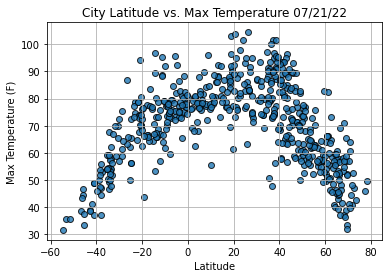

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

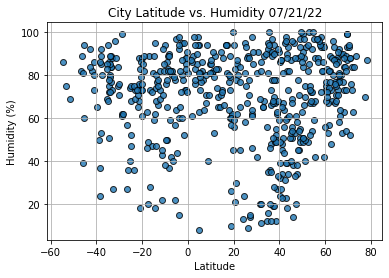

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

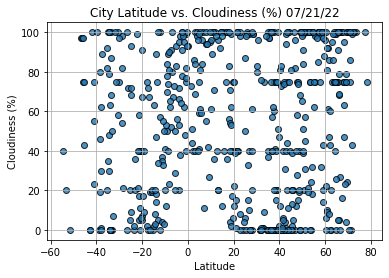

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

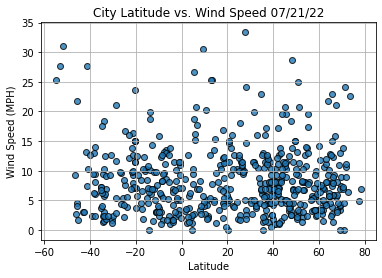

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data.
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [33]:
index13 = city_data_df.loc[13] 
index13

City                   Bredasdorp
Country                        ZA
Date          2022-07-21 17:22:06
Lat                      -34.5322
Lng                       20.0403
Max Temp                    49.24
Humidity                       86
Cloudiness                     30
Wind Speed                    1.3
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
546     True
547     True
548     True
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<= 0)]

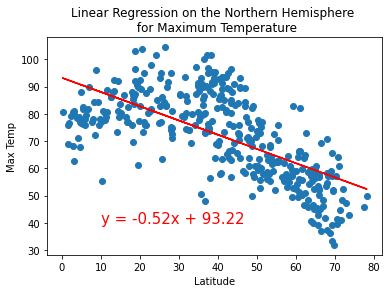

In [50]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the Function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,40))

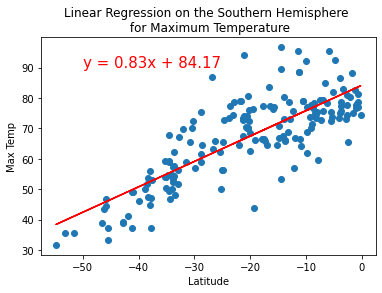

In [56]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the Function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,90))

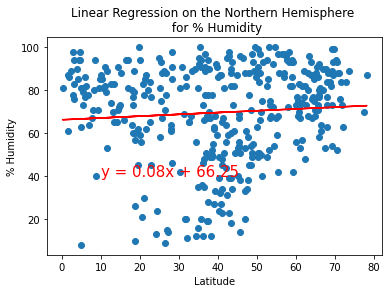

In [52]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the Function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity",(10,40))

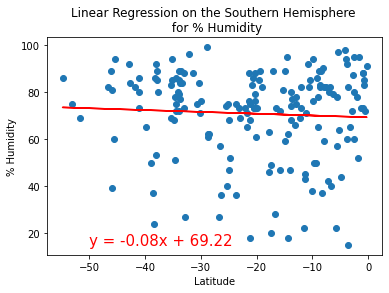

In [55]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the Function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity",(-50,15))

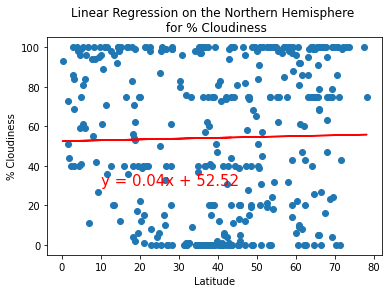

In [65]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the Function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness",(10,30))

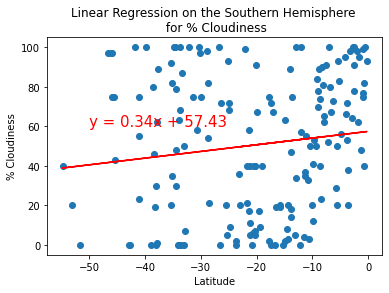

In [62]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the Function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness",(-50,60))

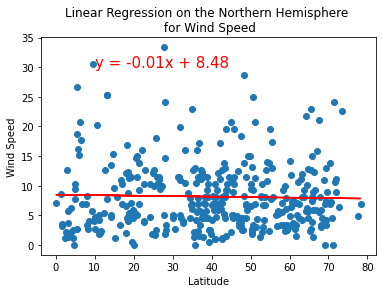

In [66]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the Function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed",(10,30))

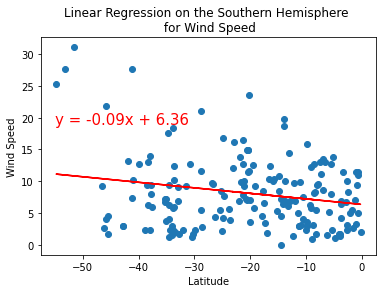

In [71]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the Function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed",(-55,19))

In [72]:
!pip install gmaps

NameError: name 'r_value' is not defined